![BABIES](malaysian_babies.jfif)

A live birth is a birth with signs of life upon delivery, even if only for a short while. The data on live births in Malaysia is tabulated based on information reported during the births registration process, specifically in the in Register of Birth Form (JPN.LM01). In particular, the 'state' reported in this dataset is based on the place of usual residence of the mother, not the geographical location in which the baby was born. For example, a baby born in a hospital in Kedah to a family who resides in Perlis will be counted as a live birth for Perlis.

Analyzing changes in birth rates over time by state, ethnicity, and gender are important as we can understand population dynamics, demographic shifts, and potential disparities.

In [2]:
import pandas as pd

# Read in the data
birth = pd.read_csv("birth_sex_ethnic_state.csv")

# Preview the data
birth.head()

,state,date,sex,ethnicity,abs
0,Johor,2000,both,overall,67183
1,Johor,2001,both,overall,61432
2,Johor,2002,both,overall,59699
3,Johor,2003,both,overall,58230
4,Johor,2004,both,overall,57339


In [3]:
# Display number of rows
len(birth)

7518

In [4]:
# Check for null values
birth.isna().sum()

state        0
date         0
sex          0
ethnicity    0
abs          0
dtype: int64

In [5]:
# Subset data for rows with both sexes and all ethnicities
overall_birth = birth[(birth["ethnicity"]=="overall") & (birth["sex"]=="both")]
overall_birth

,state,date,sex,ethnicity,abs
0,Johor,2000,both,overall,67183
1,Johor,2001,both,overall,61432
2,Johor,2002,both,overall,59699
3,Johor,2003,both,overall,58230
4,Johor,2004,both,overall,57339
...,...,...,...,...,...
353,W.P. Putrajaya,2018,both,overall,2400
354,W.P. Putrajaya,2019,both,overall,2316
355,W.P. Putrajaya,2020,both,overall,2143
356,W.P. Putrajaya,2021,both,overall,2106


In [6]:
# Find total and average number of births by state from 2000-2022
birth_by_state = overall_birth.groupby("state")["abs"].agg(['sum','mean']).round(2).reset_index()
birth_by_state

,state,sum,mean
0,Johor,1340817,58296.39
1,Kedah,815926,35475.04
2,Kelantan,841945,36606.30
3,Melaka,319228,13879.48
4,Negeri Sembilan,403046,17523.74
5,Pahang,608894,26473.65
6,Perak,847349,36841.26
7,Perlis,95904,4169.74
8,Pulau Pinang,509988,22173.39
9,Sabah,1159985,50434.13


In [7]:
# Sort values in descending order
sum_data = birth_by_state['sum']
sorted_data = sum_data.sort_values(ascending=False)

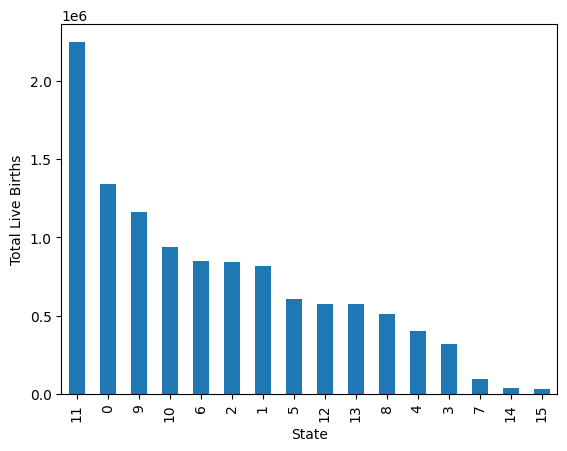

In [8]:
import matplotlib.pyplot as plt

# Display bar chart of total births by state
sorted_data.plot(kind="bar")
plt.xlabel("State")
plt.ylabel("Total Live Births")
plt.show()

Selangor has the highest total number of births, with a total of 2,247,051 births.

In [9]:
import geopandas as gpd

# Read in the file
malaysia_states = gpd.read_file('malaysia.state.geojson')

In [10]:
import folium

# initialize the map and store it in a m object
m = folium.Map(location=[4.2105, 101.9758], zoom_start=6, tiles="cartodb positron")

folium.Choropleth(
    geo_data=malaysia_states,
    name="choropleth",
    data=birth_by_state,
    columns=["state", "sum"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Total Live Births",
).add_to(m)

folium.LayerControl().add_to(m)

m

In [12]:
#birth_rate = (number_of_live_births / total_population) * 1000

In [64]:
# Find total and average number of births by year
birth_by_year = overall_birth.groupby("date")["abs"].agg(['sum','mean']).round(2).reset_index()
birth_by_year

,date,sum,mean
0,2000,537853,35856.87
1,2001,505479,33698.60
2,2002,494538,32969.20
3,2003,481399,32093.27
4,2004,481800,32120.00
5,2005,474473,31631.53
6,2006,472698,31513.20
7,2007,479647,31976.47
8,2008,493203,32880.20
9,2009,501644,33442.93


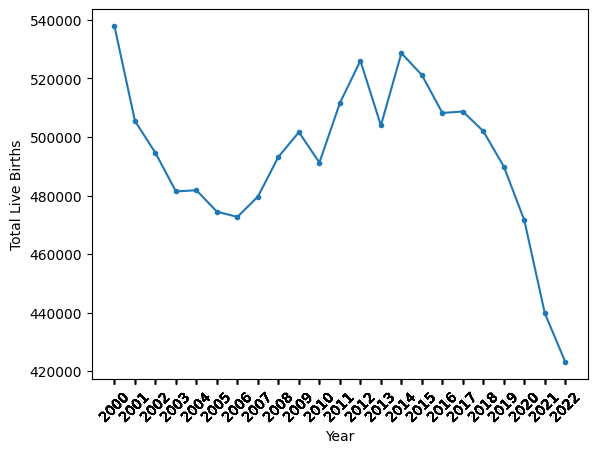

In [18]:
# Display line chart of total births by year
overall_birth.groupby("date")["abs"].sum().plot(kind="line", marker = '.', rot=45)
plt.xticks(ticks=overall_birth["date"])
plt.xlabel("Year")
plt.ylabel("Total Live Births")
plt.show()

The annual birth rate has shown a declining trend from 2000 to 2022.

In [36]:
fertility = pd.read_csv('fertility.csv')
fertility.head()

,date,age_group,fertility_rate
0,1958,tfr,6.28
1,1959,tfr,6.18
2,1960,tfr,6.04
3,1961,tfr,6.20
4,1962,tfr,6.04


In [44]:
fertility_all = fertility[(fertility['age_group']=='tfr') & (fertility['date'] > 1999)]
fertility_all.head()

,date,age_group,fertility_rate
42,2000,tfr,2.93
43,2001,tfr,2.71
44,2002,tfr,2.61
45,2003,tfr,2.49
46,2004,tfr,2.45


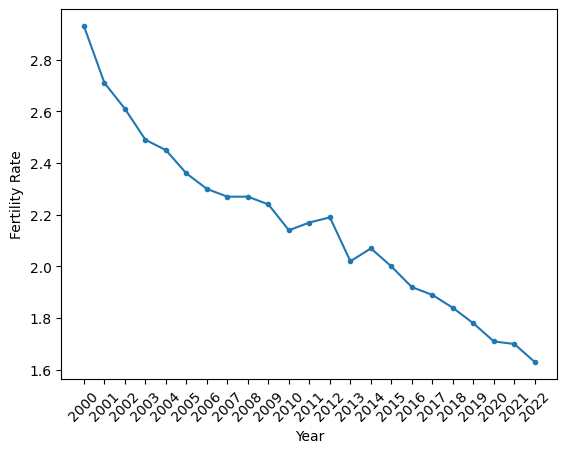

In [60]:
# Display line chart of total births by year
plt.plot(fertility_all['date'],fertility_all['fertility_rate'], marker = '.')
plt.xticks(ticks=fertility_all['date'], rotation=45)
plt.xlabel("Year")
plt.ylabel("Fertility Rate")
plt.show()

The fertility rate in Malaysia has been on a downward trend as well, reaching an all-time low of 1.63 children per woman in 2022.

In [62]:
hh_income = pd.read_csv('hh_income_state.csv')
hh_income.head()

,state,date,income_mean,income_median
0,Johor,1970,237,NaN
1,Johor,1974,382,269.0
2,Johor,1976,513,370.0
3,Johor,1979,731,518.0
4,Johor,1984,1065,793.0


In [11]:
# Subset data for rows with all ethnicities but exclude the rows for both sexes
gender_birth = birth[(birth["ethnicity"]=="overall") & (birth["sex"]!="both")]
gender_birth

,state,date,sex,ethnicity,abs
358,Johor,2000,male,overall,34726
359,Johor,2001,male,overall,31857
360,Johor,2002,male,overall,30922
361,Johor,2003,male,overall,30223
362,Johor,2004,male,overall,29518
...,...,...,...,...,...
1069,W.P. Putrajaya,2018,female,overall,1149
1070,W.P. Putrajaya,2019,female,overall,1105
1071,W.P. Putrajaya,2020,female,overall,1070
1072,W.P. Putrajaya,2021,female,overall,1016


In [12]:
# Find total number of births by gender
gender_birth.groupby("sex")["abs"].sum()

sex
female    5484013
male      5864296
Name: abs, dtype: int64

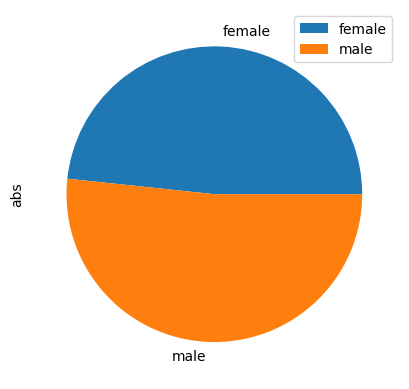

In [25]:
# Display pie chart of total number of births by gender
gender_birth.groupby("sex")["abs"].sum().plot(kind="pie")
plt.legend()
plt.show()

Number of male babies exceeds female babies from 2000-2022 by 6.93%.

In [14]:
# Subset data for rows with both sexes but exclude the rows for all ethnicities
ethnicity_birth = birth[(birth["ethnicity"]!="overall") & (birth["sex"]=="both")]
ethnicity_birth

,state,date,sex,ethnicity,abs
1074,Johor,2000,both,bumi_malay,38118
1075,Johor,2001,both,bumi_malay,35702
1076,Johor,2002,both,bumi_malay,34987
1077,Johor,2003,both,bumi_malay,34217
1078,Johor,2004,both,bumi_malay,33677
...,...,...,...,...,...
6797,W.P. Putrajaya,2018,both,other_noncitizen,19
6798,W.P. Putrajaya,2019,both,other_noncitizen,18
6799,W.P. Putrajaya,2020,both,other_noncitizen,18
6800,W.P. Putrajaya,2021,both,other_noncitizen,10


In [26]:
# Find total number of births by ethnicity
ethnic_data = ethnicity_birth.groupby("ethnicity")["abs"].sum()
sorted_data2 = ethnic_data.sort_values(ascending=False)
sorted_data2

ethnicity
bumi_malay          6977353
chinese             1744957
bumi_other          1431270
indian               600939
other_noncitizen     380962
other_citizen        212828
Name: abs, dtype: int64

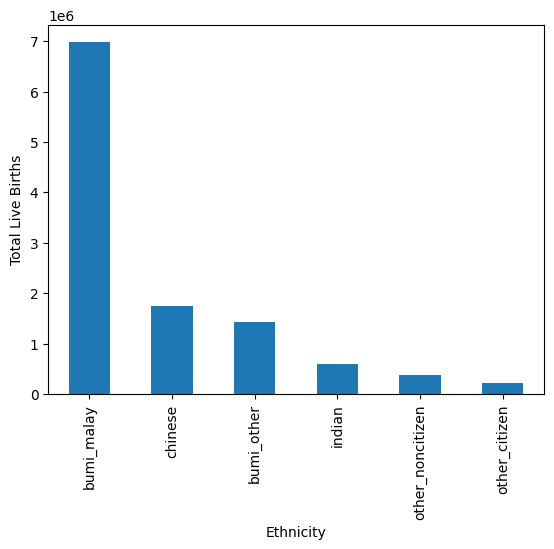

In [28]:
# Display bar chart of total number of births by ethnicity
sorted_data2.plot(kind="bar")
plt.xlabel("Ethnicity")
plt.ylabel("Total Live Births")
plt.show()

Most babies are of Malay ethnicity, with a total of 6,977,353 births from 2000-2022.

In [67]:
# Subset data for rows with both sexes but exclude the rows for all ethnicities
ethnicity_birth_gender = birth[(birth["ethnicity"]!="overall") & (birth["sex"]!="both")]
ethnicity_birth_gender

,state,date,sex,ethnicity,abs
1432,Johor,2000,male,bumi_malay,19583
1433,Johor,2001,male,bumi_malay,18519
1434,Johor,2002,male,bumi_malay,18090
1435,Johor,2003,male,bumi_malay,17668
1436,Johor,2004,male,bumi_malay,17306
...,...,...,...,...,...
7513,W.P. Putrajaya,2018,female,other_noncitizen,10
7514,W.P. Putrajaya,2019,female,other_noncitizen,5
7515,W.P. Putrajaya,2020,female,other_noncitizen,9
7516,W.P. Putrajaya,2021,female,other_noncitizen,5


In [68]:
# Find total number of births by ethnicity
ethnic_data2 = ethnicity_birth_gender.groupby(["ethnicity","sex"])["abs"].sum()
sorted_data3 = ethnic_data2.sort_values(ascending=False)
sorted_data3

ethnicity         sex   
bumi_malay        male      3603517
                  female    3373836
chinese           male       904140
                  female     840817
bumi_other        male       741320
                  female     689950
indian            male       307213
                  female     293726
other_noncitizen  male       197534
                  female     183428
other_citizen     male       110572
                  female     102256
Name: abs, dtype: int64

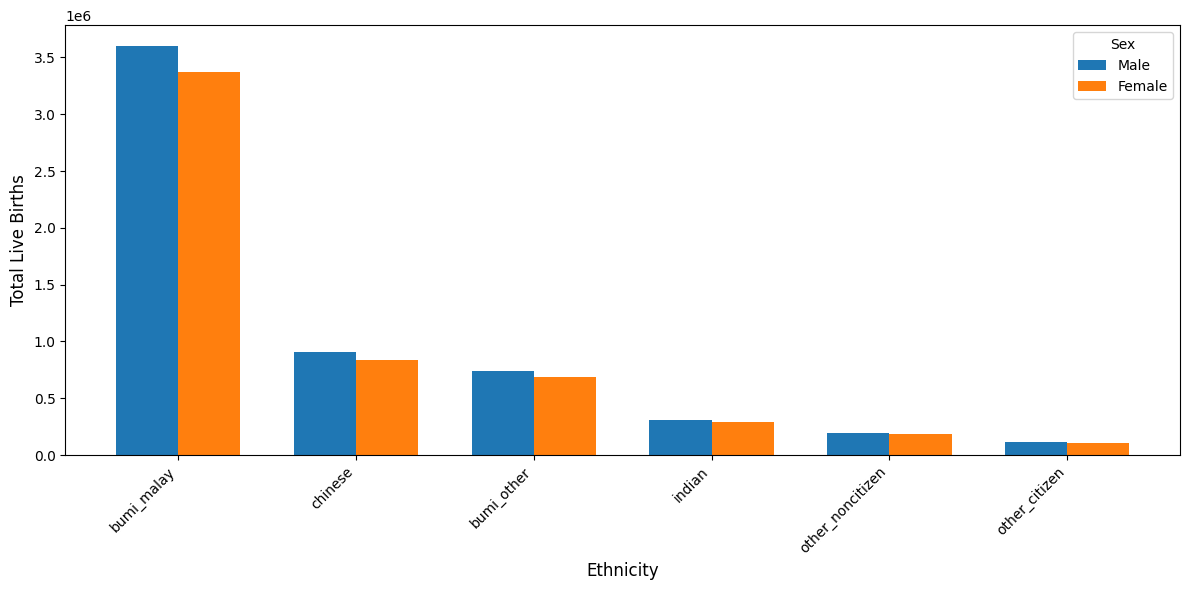

In [73]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'sorted_data3'
# If it's named differently, replace 'sorted_data3' with your actual DataFrame name

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Get unique ethnicities and set up x-axis
ethnicities = sorted_data3.index.get_level_values('ethnicity').unique()
x = range(len(ethnicities))

# Plot bars for male and female
bar_width = 0.35
ax.bar(x, sorted_data3.xs('male', level='sex'), width=bar_width, label='Male', align='center')
ax.bar([i + bar_width for i in x], sorted_data3.xs('female', level='sex'), width=bar_width, label='Female', align='center')

# Customize the chart
ax.set_xlabel('Ethnicity', fontsize=12)
ax.set_ylabel('Total Live Births', fontsize=12)
ax.set_xticks([i + bar_width/2 for i in x])
ax.set_xticklabels(ethnicities, rotation=45, ha='right')
ax.legend(title='Sex', fontsize=10)

# Adjust layout and display the chart
plt.tight_layout()
plt.show()